In [4]:
import os
from pylab import *
from pysb.core import *
from pysb.bng import *
from pysb.integrate import *
import matplotlib.pyplot as plt
import numpy as np
from pysb.util import alias_model_components
from pysb.simulator import CupSodaSimulator
from pysb.simulator import ScipyOdeSimulator
from pysb.simulator.bng import BngSimulator
import sys
sys.path.append('../')
sys.path.append('/home/ildefog/main/Projects/NERM/')
sys.path.append('/home/ildefog/main/Projects/NERM/param_files/')
from model_files.nerm import model 
import pandas as pd
from scipy import stats
from pysb.simulator import SimulationResult
import logging
import os
from pysb.logging import setup_logger
from pysb.simulator.cupsoda import CupSodaSimulator
from pysb.simulator.scipyode import ScipyOdeSimulator
from sensitivity_analysis4 import InitialsSensitivity
from pysb.util import update_param_vals
from scipy.stats import norm,uniform, halfnorm
from pysb.tools.sensitivity_analysis import PairwiseSensitivity
os.environ['OMP_NUM_THREADS'] = '1'
from scipy.optimize import curve_fit

rules: 25
reactions: 40
species: 37
parameters: 54
rate constants: 40

ComponentSet([
 Parameter('A20_0', 9000.0),
 Parameter('C8_0', 3799.0),
 Parameter('cIAP_0', 9000.0),
 Parameter('CYLD_0', 9000.0),
 Parameter('FADD_0', 3109.0),
 Parameter('flip_L_0', 3900.0),
 Parameter('Lubac_0', 7226.0),
 Parameter('MLKLa_0', 5544.0),
 Parameter('RIP1_0', 40000.0),
 Parameter('RIP3_0', 10654.0),
 Parameter('TNF_0', 2326.0),
 Parameter('TNFR_0', 4800.0),
 Parameter('TRADD_0', 4696.0),
 Parameter('TRAF_0', 11776.0),
 Parameter('p1f', 1e-06),
 Parameter('p1r', 0.001),
 Parameter('p2f', 0.001),
 Parameter('p3f', 1e-06),
 Parameter('p3r', 0.001),
 Parameter('p4f', 1e-06),
 Parameter('p4r', 0.001),
 Parameter('p5f', 1e-06),
 Parameter('p5r', 0.001),
 Parameter('p6f', 1e-06),
 Parameter('p6r', 0.001),
 Parameter('p7f', 0.1),
 Parameter('p8f', 1e-06),
 Parameter('p8r', 0.001),
 Parameter('p9f', 1e-06),
 Parameter('p9r', 0.001),
 Parameter('p10f', 0.1),
 Parameter('p11f', 1e-06),
 Parameter('p11r', 0.001

In [23]:
c2_paramfiles = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')

In [24]:
c2_paramfiles[0]

array([2.32600000e+03, 4.80000000e+03, 4.69600000e+03, 4.00000000e+04,
       1.17760000e+04, 9.00000000e+03, 9.00000000e+03, 9.00000000e+03,
       3.10900000e+03, 3.90000000e+03, 7.22600000e+03, 3.79900000e+03,
       1.06540000e+04, 5.54400000e+03, 1.98794695e-07, 5.49030660e-05,
       2.79985027e-04, 6.93725898e-02, 4.02442372e+00, 3.34497415e+02,
       1.16178260e-03, 1.37493377e-02, 1.83963104e-07, 1.09571830e-01,
       2.06022182e-03, 7.27252952e-03, 1.56339761e-02, 1.22496256e-04,
       2.40319546e-01, 1.98512681e-03, 1.75780767e-01, 2.40319546e-01,
       6.43362879e-07, 1.75780767e-01, 2.00635884e+03, 6.62228312e-04,
       1.07201489e-04, 6.72046457e-04, 7.87039186e-03, 1.30055693e+00,
       6.08007774e-02, 3.81244753e+01, 5.45753992e-03, 1.65739974e+00,
       1.19342779e-03, 3.03563288e-04, 1.33209971e+01, 1.88650892e+00,
       1.55022611e-04, 2.36576569e-03, 5.26505520e-06, 2.41568281e+00,
       9.17830983e-01, 4.92855732e+03])

In [2]:
c0 = np.load('../NecroptosisSens/cluster0/necro_pars10k_cluster0_5720_mod.npy')
c1 = np.load('../NecroptosisSens/cluster1/necro_pars10k_cluster1_5720_mod.npy')
c2 = np.load('../NecroptosisSens/cluster2/necro_pars10k_cluster2_5720_mod.npy')
c3 = np.load('../NecroptosisSens/cluster3/necro_pars10k_cluster3_5720_mod.npy')

In [6]:
print(c2[0])

[2.32600000e+03 4.80000000e+03 4.69600000e+03 4.00000000e+04
 1.17760000e+04 9.00000000e+03 9.00000000e+03 9.00000000e+03
 3.10900000e+03 3.90000000e+03 7.22600000e+03 3.79900000e+03
 1.06540000e+04 5.54400000e+03 1.98794695e-07 5.49030660e-05
 2.79985027e-04 6.93725898e-02 4.02442372e+00 3.34497415e+02
 1.16178260e-03 1.37493377e-02 1.83963104e-07 1.09571830e-01
 2.06022182e-03 7.27252952e-03 1.56339761e-02 1.22496256e-04
 2.40319546e-01 1.98512681e-03 1.75780767e-01 2.40319546e-01
 6.43362879e-07 1.75780767e-01 2.00635884e+03 6.62228312e-04
 1.07201489e-04 6.72046457e-04 7.87039186e-03 1.30055693e+00
 6.08007774e-02 3.81244753e+01 5.45753992e-03 1.65739974e+00
 1.19342779e-03 3.03563288e-04 1.33209971e+01 1.88650892e+00
 1.55022611e-04 2.36576569e-03 5.26505520e-06 2.41568281e+00
 9.17830983e-01 4.92855732e+03]


In [ ]:
mode2_100 = np.load('../../param_files/necro_pars10k_cluster2_5720_mod.npy')[:,14:]
mode2_100 = np.log10(mode2_100)
tspan = np.linspace(0, 1440, 500)

In [ ]:
mode2_100[0]

In [ ]:
print(mode2_100[0])

In [ ]:
clus1 = np.load('../NecroptosisSens/cluster2/necro_pars10k_cluster2_5720_mod.npy')[:,14:]

In [ ]:
n_pars = len(mode2_100)
all_pars = np.zeros((n_pars, len(model.parameters)))

rate_params = model.parameters_rules()
param_values = np.array([p.value for p in model.parameters])
rate_mask = np.array([p in rate_params for p in model.parameters])

for i in range(n_pars):
    par = mode2_100[i]
    param_values[rate_mask] = 10**par
    all_pars[i] = param_values

In [8]:
list(model.initial_conditions)

[(TNF(brec=None), Parameter('TNF_0', 2326.0)),
 (TNFR(blig=None, brip=None, bDD=None), Parameter('TNFR_0', 4800.0)),
 (TRADD(brec=None, brip=None, state='unmod', bDD1=None, bDD2=None),
  Parameter('TRADD_0', 4696.0)),
 (RIP1(bscf=None, bub1=None, bub2=None, bub3=None, bDD=None, btraf=None, bRHIM=None, bMLKL=None, state='unmod'),
  Parameter('RIP1_0', 40000.0)),
 (TRAF(brip=None, bciap=None, bcyld=None, state='unmod'),
  Parameter('TRAF_0', 11776.0)),
 (cIAP(btraf=None), Parameter('cIAP_0', 9000.0)),
 (MLKL(bRHIM=None, state='unmod'), Parameter('MLKLa_0', 5544.0)),
 (A20(brip=None), Parameter('A20_0', 9000.0)),
 (CYLD(brip=None, btraf=None), Parameter('CYLD_0', 9000.0)),
 (FADD(bDD=None, bDED1=None, bDED2=None), Parameter('FADD_0', 3109.0)),
 (RIP3(bRHIM=None, bDD=None, state='unmod'), Parameter('RIP3_0', 10654.0)),
 (flip_L(bDED=None, state='A'), Parameter('flip_L_0', 3900.0)),
 (LUBAC(brip=None), Parameter('Lubac_0', 7226.0)),
 (C8(bf=None, flip=None, state='I'), Parameter('C8_0', 379

In [5]:
tspan2 = np.linspace(0,1800,500)

In [25]:
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=c2_paramfiles, num_processors = 20)
mode1df_wtm1paramfiles = mode1wtm1.dataframe

2022-01-08 22:53:16.540 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-08 22:53:16.552 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-08 22:53:16.622 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-08 22:53:16.785 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-08 22:54:56.729 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-08 22:54:56.731 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-08 22:54:58.256 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [9]:
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(param_values=c2, num_processors = 20)
mode1df_wtm1 = mode1wtm1.dataframe

2022-01-08 22:40:24.058 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-08 22:40:24.802 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-08 22:40:24.926 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-08 22:40:25.075 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-08 22:42:03.570 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-08 22:42:03.573 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-08 22:42:04.973 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [11]:
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(initials = {m.A20(brip=None):2700},
                                        param_values=c2, num_processors = 20)
mode1df_wtm1kd = mode1wtm1.dataframe

2022-01-08 22:43:06.865 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-08 22:43:06.876 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-08 22:43:06.946 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-08 22:43:07.103 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-08 22:44:42.012 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-08 22:44:42.014 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-08 22:44:43.428 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


In [12]:
m = model.components
solverwtm1 = ScipyOdeSimulator(model, tspan=tspan2, verbose = True)
mode1wtm1  = solverwtm1.run(initials = {m.A20(brip=None):90000},
                                        param_values=c2, num_processors = 20)
mode1df_wtm1oe = mode1wtm1.dataframe

2022-01-08 22:44:45.236 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Simulator created
2022-01-08 22:44:45.242 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Equation mode set to "cython"
2022-01-08 22:44:45.277 - pysb.simulator.scipyode - INFO - [model_files.nerm] Simulation(s) started
2022-01-08 22:44:45.401 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] Multi-processor (parallel) mode using 20 processes
2022-01-08 22:46:22.061 - pysb.simulator.scipyode - INFO - [model_files.nerm] All simulation(s) complete
2022-01-08 22:46:22.064 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor started
2022-01-08 22:46:23.650 - pysb.simulator.scipyode - DEBUG - [model_files.nerm] SimulationResult constructor finished


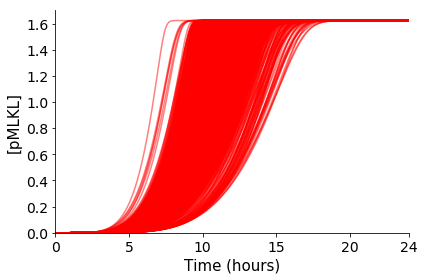

In [14]:
fig, ax = plt.subplots()
for n in range(len(c2)):
    plt.plot(tspan2/60, mode1df_wtm1.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'red', alpha = 0.5) 
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel('[pMLKL]', fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

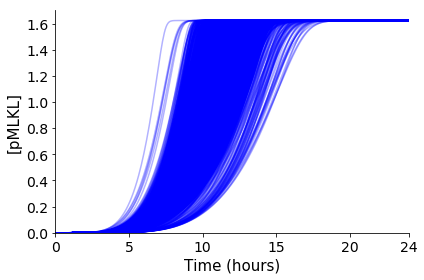

In [15]:
fig, ax = plt.subplots()
for n in range(len(c2)): 
    plt.plot(tspan2/60, mode1df_wtm1kd.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color =  'blue', alpha = 0.3)
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel('[pMLKL]', fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

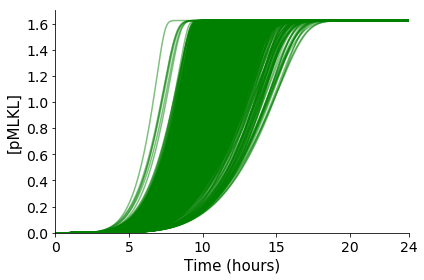

In [16]:
fig, ax = plt.subplots()
for n in range(len(c2)):
    plt.plot(tspan2/60, mode1df_wtm1oe.loc[n]['MLKLa_obs'].iloc[:]/5544, lw=1.5, 
             zorder = 1, color = 'green', alpha = 0.5) 
plt.xlabel("Time (hours)", fontsize=15)
plt.ylabel('[pMLKL]', fontsize=15)
plt.xlim(xmin = 0, xmax = 16)
plt.ylim(ymin = 0)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
right_side = ax.spines["right"]
right_side.set_visible(False)
top = ax.spines["top"]
top.set_visible(False)
ax.set_xticks([0, 5, 10, 15, 20, 24])
ax.grid(False)
plt.tight_layout()
# plt.savefig('pmlkl_allpars_clus0_tnf100_noframe.pdf')
plt.show() 

In [ ]:
thresh = 2772
ttd = []
for j in range(len(c2)):
    i_range = range(len(mode1df_wtm1.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm1.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttd.append(mode1df_wtm1.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttd.append(np.inf)
for i in range(len(ttd)):
    if ttd[i] == np.inf:
        ttd[i] = 2100            
# print()        
# print(ttd)
# print(len(ttd))
# print('TTD = ', m3alldf100wt['time'][idx])        

In [ ]:
thresh = 2772
ttdkd = []
for j in range(len(c2)):
    i_range = range(len(mode1df_wtm1kd.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm1kd.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdkd.append(mode1df_wtm1kd.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdkd.append(np.inf)
for i in range(len(ttdkd)):
    if ttdkd[i] == np.inf:
        ttdkd[i] = 2100            
# print()        
# print(ttd)
# print(len(ttd))
# print('TTD = ', m3alldf100wt['time'][idx])        

In [ ]:
thresh = 2772
ttdoe = []
for j in range(len(c2)):
    i_range = range(len(mode1df_wtm1oe.loc[j]['MLKLa_obs']))
    for i in i_range:
#         print(m3alldf100wt.loc[j]['MLKLa_obs'].iloc[i])
        if mode1df_wtm1oe.loc[j]['MLKLa_obs'].iloc[i] > thresh:
            ttdoe.append(mode1df_wtm1oe.loc[j].index[i])
            break
        if i == i_range[-1]:
            ttdoe.append(np.inf)
for i in range(len(ttdoe)):
    if ttdoe[i] == np.inf:
        ttdoe[i] = 2100            
# print()        
# print(ttd)
# print(len(ttd))
# print('TTD = ', m3alldf100wt['time'][idx])        

In [ ]:
#['lightcoral', 'lightseagreen', 'mediumpurple', 'peru']
mode1df = pd.DataFrame({'WT': ttd, 
                          'A20 KD': ttdkd,
                          'A20 OE': ttdoe})
dfclus0n = pd.DataFrame(data = mode1df, columns = ['WT', 'A20 KD', 'A20 OE'])
dfclus0n = pd.melt(dfclus0n)

In [ ]:
sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
# my_pal = {"WT": "mediumaquamarine", "CYLDKO": "limegreen", "A20KO":"darkgreen"}
my_pal = {"WT": "blue", "A20 KD": "cornflowerblue", "A20 OE":"darkblue"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfclus0n, zorder=2, palette=my_pal)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_ylabel('')
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 2200, xmin = 0)
ax.set_xticks([0, 600, 1200, 1800, 2100])
ax.set_xticklabels(['0', '600', '1200', '1800', 'inf']) #$\infty$
# ax.set_yticklabels(['0', '600', '1200', '1800', 'inf']) #$\infty$
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode4was2_swarm_bluecolors.pdf')
plt.show()

In [18]:
threshold2 = 2772

In [28]:
df_threshtimeswtpf =mode1df_wtm1paramfiles.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [27]:
df_threshtimeswt = mode1df_wtm1.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimeskd   = mode1df_wtm1kd.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])
df_threshtimesoe = mode1df_wtm1oe.groupby('simulation').apply(lambda x: (x > threshold2).idxmax()).apply(lambda x: [y[1] for y in x])

In [29]:
mode2dfn = pd.DataFrame({'WTpf': df_threshtimeswtpf['MLKLa_obs'],
                            'WT': df_threshtimeswt['MLKLa_obs'],
                            'KD': df_threshtimeskd['MLKLa_obs'],
                          'OE': df_threshtimesoe['MLKLa_obs'] })
framesm4 = [mode2dfn]
dfclus4 = pd.DataFrame(data = pd.concat(framesm4), columns = ['WTpf','WT','KD','OE'])
dfm4fadd2 = pd.melt(dfclus4)

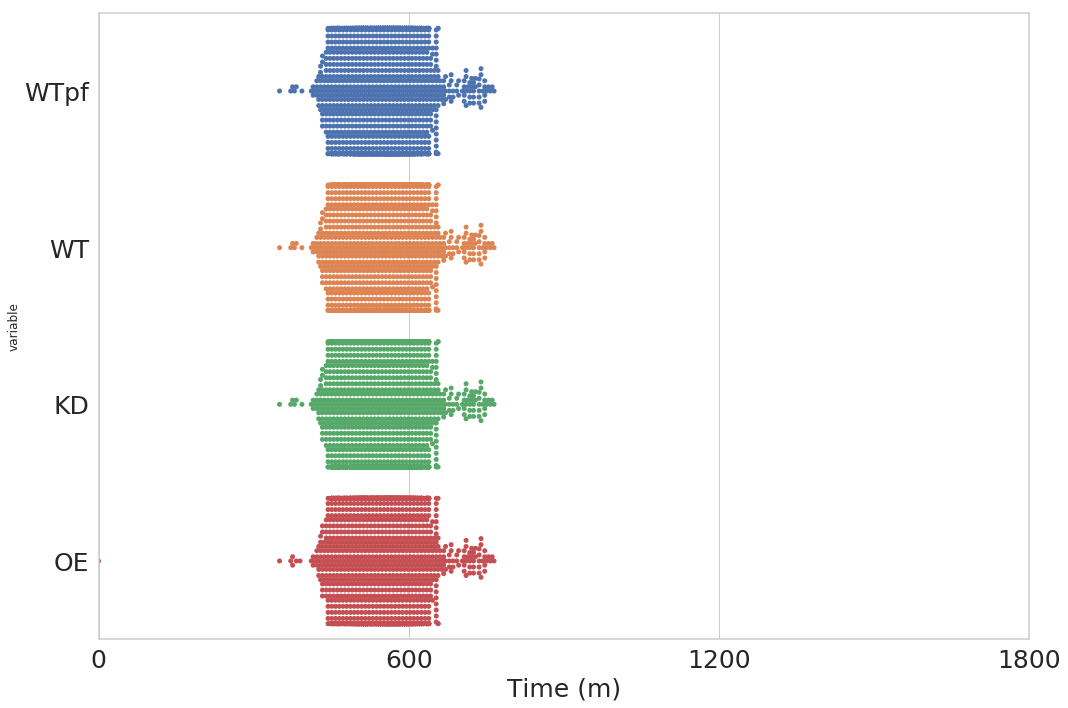

In [30]:
import seaborn as sns
sns.set(style="whitegrid")
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
# my_pal = {"WT": "red", "KD": "lightcoral", "OE":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfm4fadd2, zorder=2)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 1)
ax.set_xticks([0, 600, 1200, 1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

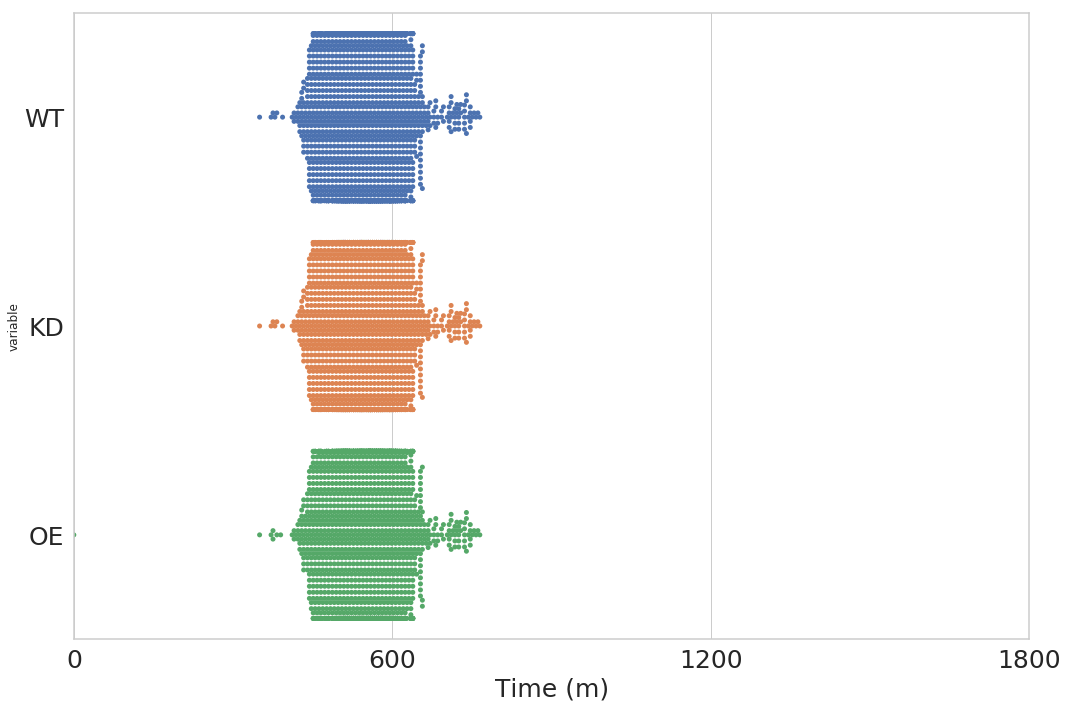

In [22]:
import seaborn as sns
sns.set(style="whitegrid")
sns.color_palette("hls", 8)
fig, ax = plt.subplots(figsize = (15,10))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(1.5)
# my_pal = {"WT": "red", "KD": "lightcoral", "OE":"darkred"}
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b = sns.swarmplot(x="value", y="variable", data=dfm4fadd, zorder=2)
# b = sns.boxplot(x = "value", y ="variable", data = dfclus0, notch = True, width = 0.5, palette = my_pal)
b.set_xlabel("Time (m)",fontsize=25)
plt.xticks(fontsize = 25)
# b.set_ylabel("Cluster 0 New",fontsize=15)
b.tick_params(labelsize=25)
plt.xlim(xmax = 1800, xmin = 1)
ax.set_xticks([0, 600, 1200, 1800])
plt.tight_layout()
# plt.savefig('pmlkl_cylda20dko_100tnf_mode1_swarm_redcolors.pdf')
plt.show()

In [ ]:
import seaborn as sns #fadd
plt.figure(figsize = (9,6))
sns.stripplot(data=dfm4fadd, y="species", x="value", hue="variable", dodge=True, 
              orient = 'h',linewidth=0.5,size=7)
plt.xlim(xmin = 1, xmax = 1800)
plt.legend(loc = 'lower right')

In [ ]:
for i,t in enumerate(tspan):
    print(i,":",t)

In [ ]:
sim_idx_faddkd = [idx for idx in range(len(all_pars)) if mode1df_wtm1oe['MLKLa_obs'][idx].iloc[312] <= 2772]
print(len(sim_idx_faddkd))

In [ ]:
import seaborn as sns #ciap
plt.figure()
sns.stripplot(data=dfm4, y="species", x="value", hue="variable", dodge=True, 
              orient = 'h',linewidth=0.5,size=7)
plt.xlim(xmin = 350, xmax = 1000)
plt.legend(loc = 'lower right')

In [ ]:
import seaborn as sns
plt.figure()
sns.stripplot(data=dfm4, y="species", x="value", hue="variable", dodge=True, 
              orient = 'h',linewidth=0.5,size=7)
plt.xlim(xmin = 350, xmax = 1000)
plt.legend(loc = 'lower right')

In [ ]:
df_threshtimeskdnew['MLKLa_obs']

In [ ]:
mode2wt = pd.DataFrame({'KD': df_threshtimeskdnew['MLKLa_obs'],
                       'species':'wt'})
dfclus4 = pd.DataFrame(data = pd.DataFrame(mode2wt), columns = ['species','WT'])
dfm4wt = pd.melt(dfclus4, id_vars=["species"])

In [ ]:
plt.figure()
sns.stripplot(data=dfm4wt, y="species", x="value", hue="variable", dodge=True, orient = 'h')
plt.xlim(xmin = 1)
plt.legend(loc = 'lower right')

In [ ]:
for i,t in enumerate(np.linspace(0,1440,500)):
    print(i,":",t)

In [ ]:
sim_idx_a20ko = [idx for idx in range(len(all_pars)) if mode1df_wtm1['MLKLa_obs'][idx].iloc[193] < 2772]
print(len(sim_idx_a20ko))